# FTR Exercise

## Part 1: Sources with memory

First, import libraries and load Hamlet from file.

In [1]:
f = open('hamlet.txt', 'r')
hamlet = f.read()
f.close()
print(hamlet[:294])

        HAMLET


        DRAMATIS PERSONAE


CLAUDIUS        king of Denmark. (KING CLAUDIUS:)

HAMLET  son to the late, and nephew to the present king.

POLONIUS        lord chamberlain. (LORD POLONIUS:)

HORATIO friend to Hamlet.

LAERTES son to Polonius.

LUCIANUS        nephew to the king.


In [2]:
from math import log2
H = lambda pr: -sum([pr[a]*log2(pr[a]) for a in pr])

In [3]:
h = []
for n in range(1,20):
    p = {}
    for k in range(len(hamlet)-n):
        key = hamlet[k:(k+n)]
        if key in p:
            p[key] += 1
        else:
            p[key] = 1
    totfreq = sum(list(p.values()))
    for a in p:
        p[a] /= totfreq
    h.append(H(p)/n)

In [4]:
hstar = [(k+2)*h[k+1]-(k+1)*h[k] for k in range(len(h)-1)]

In [5]:
import matplotlib.pyplot as plt

plt.plot(h)
plt.plot(hstar)
plt.grid()

## Part 2: Estimating probabilities

First estimate the whole file probabilities of Hamlet so as to get the entropy.

In [13]:
from itertools import groupby
f_tot = dict([(key, len(list(group))) for key, group in groupby(sorted(hamlet))])
Nin = sum([f_tot[a] for a in f_tot])
p_tot = dict([(a,f_tot[a]/Nin) for a in f_tot])

In [21]:
delta = 1
N = 10000 # length of measurement
f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
Ltot = 0
Lav = []
for k in range(N):
    p = [x/sum(f) for x in f]
    # calculate length of codeword portion for next symbol
    Ltot += -log2(p[ord(hamlet[k])])
    # record an average length measurement
    Lav.append(Ltot/(k+1))
    # now update probability table
    f[ord(hamlet[k])] += 1

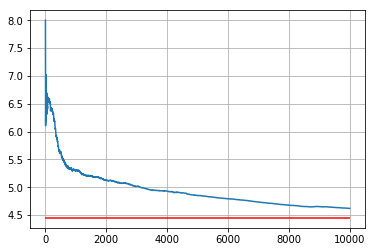

In [22]:
plt.plot(Lav)
plt.hlines(H(p_tot),0,N,colors='r')
plt.grid()